In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
titanic_df = pd.read_csv(r'J:\\Data_store\\titanic\\train.csv')
test_df = pd.read_csv(r'J:\\Data_store\\titanic\\test.csv')

In [3]:
titanic_df
#Cabin
# Sib Sp
# Parch

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



index	column	설명
0.	PassengerId	
1.	Survived	생존여부
2.	Pclass	티켓 등급
3.	Name	이름
4.	Sex	성별
5.	Age	나이
6.	SibSp	타이타닉호에 탑승한 형제/배우자 수
7.	Parch	타이타닉호에 탑승한 부모/자녀 수
8.	Ticket	티켓 번호
10	Fare	여객 요금
11.	Cabin	객실 번호
12.	Embarked	승선항

In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.count()
test_df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [5]:
value_counts = titanic_df['SibSp'].value_counts()
value_counts

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [6]:
titanic_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#siblings / spouses aboard the Titanic.  자녀 혹은 배우자랑 탄 녀석들..!, 많을 수록 아디오스.??? 단정하긴 이른디..

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
value_counts = titanic_df['Pclass'].value_counts()
value_counts


3    491
1    216
2    184
Name: Pclass, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64


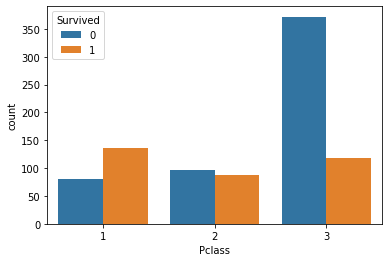

In [8]:
print(titanic_df['Pclass'].value_counts())
ax = sns.countplot(x='Pclass', hue = 'Survived', data = titanic_df)
#0 : 돌아가신 분, 1 : 생존자

In [ ]:
value_counts = titanic_df['Survived'].value_counts()
value_counts


0    549
1    342
Name: Survived, dtype: int64

In [ ]:
titanic_df.info()
print('_'*40)
test_df.info()

#타이타닉 데이터는 이미 가공이 꽤 된 데이터 구만

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [ ]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


충북대학교 석사분의 커밋 자료
https://dacon.io/competitions/open/235539/codeshare/2948?page=1&dtype=recent

In [9]:
titanic_df.pivot_table(values = 'Age', index = 'Pclass', aggfunc = 'mean')
# Pclass등급에 따른 나이 평균을 정리해보면 다음과 같다. 이를 이용해 결측값을 채워보려 한다.

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [11]:
test_df.pivot_table(values = 'Age', index = 'Pclass', aggfunc = 'mean')

,Age
Pclass,
1,40.918367
2,28.777500
3,24.027945


In [12]:
titanic_age_null = titanic_df[titanic_df.Age.isnull()]
# 결측값을 가지는 새로운 데이터 프레임을 생성한다.

# train_df.loc[train_df.Age.isnull() == True]&train_df
# 각 데이터를 1,2,3등급에 나누어서 
titanic_firstclass = titanic_age_null[titanic_age_null.Pclass == 1]
titanic_second = titanic_age_null[titanic_age_null.Pclass == 2]
titanic_third = titanic_age_null[titanic_age_null.Pclass == 3]

# 각 테이블을 각각 결측값을 채우도록 한다.
titanic_firstclass = titanic_firstclass.fillna(value = '38')
titanic_secondclass = titanic_second.fillna(value = '30')
titanic_thirdclass = titanic_third.fillna(value = '25')

In [13]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
